# Lab 03 (Advanced) - Análise Exploratória de Dados (EDA): Técnicas Avançadas
**Disciplina:** Extração e Preparação de Dados | **Professor:** Luis Aramis

Neste laboratório avançado, iremos além do `.describe()` e `.value_counts()`. Aprenderemos a diagnosticar dados faltantes, detectar *outliers* (valores atípicos), criar visualizações focadas em distribuição e analisar a correlação entre variáveis numéricas usando o dataset do **Titanic**.

## 1. Setup e Carga
Importe `pandas`, `numpy`, `matplotlib.pyplot` e `seaborn`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual do seaborn
sns.set_theme(style="whitegrid")

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
print('Dataset carregado.')

Dataset carregado.


## 2. Diagnóstico e Tratamento de Dados Faltantes
Valores nulos (NaN) podem quebrar algoritmos de ML. Primeiro, precisamos saber onde eles estão.

In [2]:
# Quantos nulos existem em cada coluna?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Exercício 2.1: Estratégias de Imputação
1.  A coluna `Cabin` tem muitos nulos. Crie uma nova coluna `Has_Cabin` que contenha `1` se o passageiro tinha cabine listada e `0` se era nulo (`NaN`).
2.  A coluna `Age` (Idade) não tem tantos nulos a ponto de precisarmos deletá-la. Preencha os nulos da coluna `Age` com a **mediana** das idades.

In [44]:
# Seu código aqui
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

mediana_idade = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana_idade)


print(df[['Cabin', 'Has_Cabin', 'Age']].head())



  Cabin  Has_Cabin   Age
0   NaN          0  22.0
1   C85          1  38.0
2   NaN          0  26.0
3  C123          1  35.0
4   NaN          0  35.0


## 3. Detecção de Outliers (Valores Atípicos)
Outliers distorcem análises de média e desvio padrão. Uma forma clássica de visualizá-los é usando o **Boxplot**.

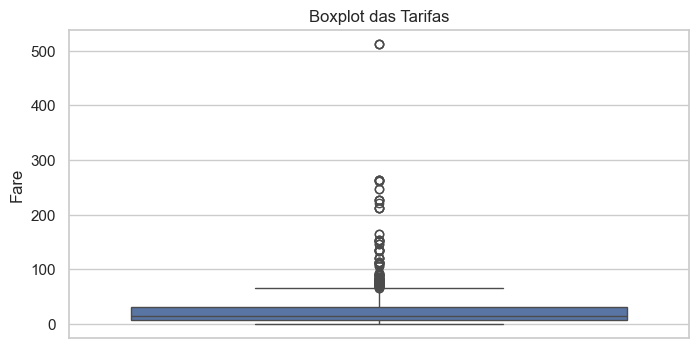

In [45]:
# Visualizando outliers na Tarifa (Fare)
plt.figure(figsize=(8,4))
sns.boxplot(y=df['Fare'])
plt.title('Boxplot das Tarifas')
plt.show()

### Exercício 3.1: Filtro via IQR
1. Calcule o intervalo interquartil (IQR) para a coluna `Fare` (Q3 - Q1).
2. Considere como outlier qualquer valor acima de `Q3 + 1.5 * IQR`.
3. Quantos passageiros são considerados outliers pela tarifa?

In [64]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR

# 4. Filtrando e contando os outliers
outliers= df[df['Fare'] > limite_superior]
quantidade_outliers = len(outliers)
print(quantidade_outliers)


116


## 4. Visualização de Distribuições
Estatísticas resumidas escondem o formato dos dados. Gráficos de distribuição revelam a verdadeira natureza da variável.

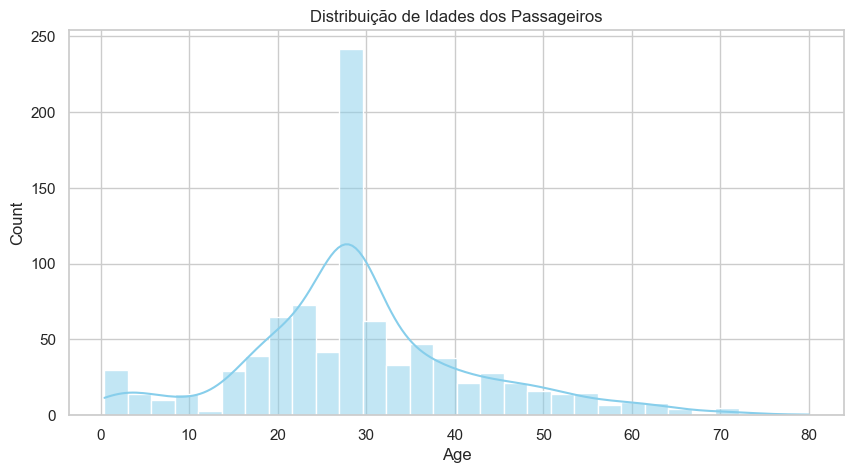

In [65]:
# Distribuição de Idades KDE (Kernel Density Estimation)
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribuição de Idades dos Passageiros')
plt.show()

### Exercício 4.1: Segmentação Visual
Use a função `sns.kdeplot()` (ou `histplot` com o parâmetro `hue`) para visualizar a distribuição de idades (`Age`) dividida pelo status de sobrevivência (`Survived`). 

Pergunta: Houve diferença na distribuição de idades entre quem sobreviveu e quem não sobreviveu?

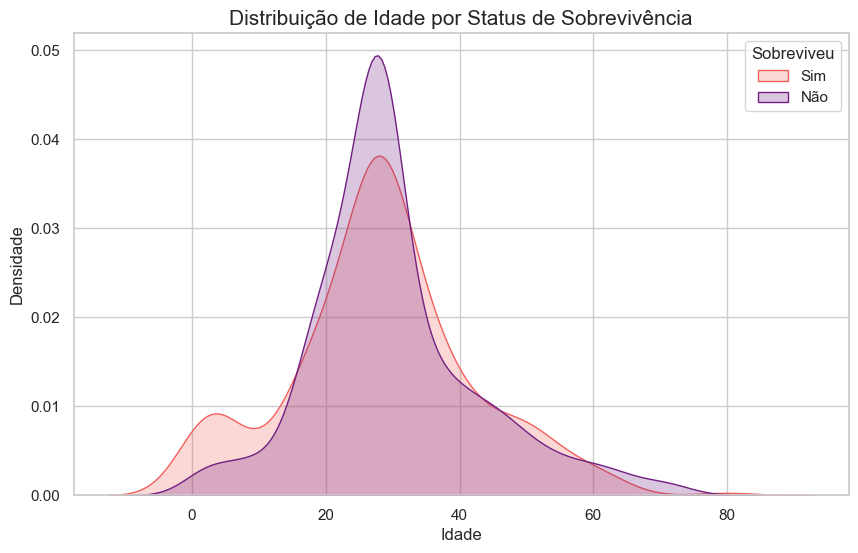

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o estilo visual
sns.set_theme(style="whitegrid")

# Criando o gráfico de densidade (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, palette='magma', common_norm=False)

plt.title('Distribuição de Idade por Status de Sobrevivência', fontsize=15)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(title='Sobreviveu', labels=['Sim', 'Não'])

plt.show()

## 5. Análise de Correlação Numérica
Correlação mede como duas variáveis numéricas se movem juntas (de -1 a 1). Não implica causalidade, mas é útil para feature selection.

In [71]:
# Selecionar apenas colunas numéricas
num_df = df.select_dtypes(include=[np.number])

# Calcular a matriz de correlação de Pearson
corr_matrix = num_df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.725541
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.240314
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.036987
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.482075
Has_Cabin,0.019919,0.316912,-0.725541,0.240314,-0.040460,0.036987,0.482075,1.000000


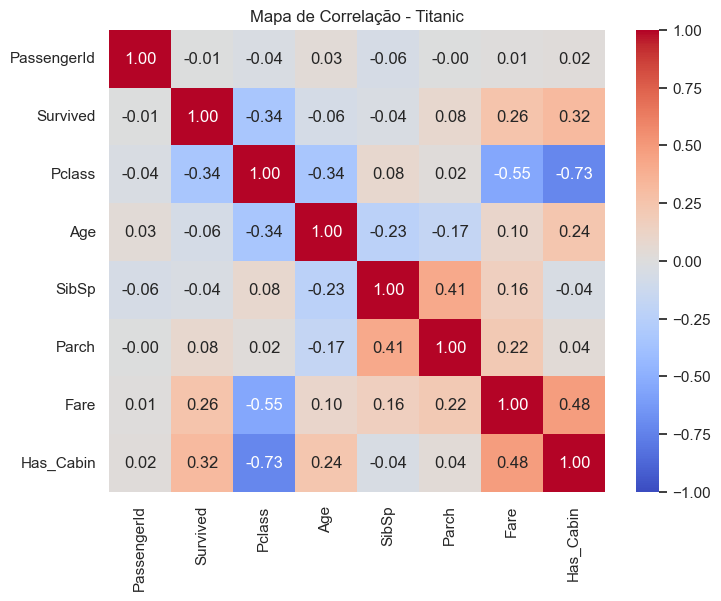

In [72]:
# Visualizar a correlação com um Heatmap (Mapa de Calor)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Correlação - Titanic')
plt.show()

### Discussão 5.1
Nota: Embora `Survived` e `Pclass` apareçam no mapa numérico, elas são variáveis com significado *categórico/ordinal*. O baixo coeficiente entre `Fare` e `Age` (próximo a 0) indica que não há relação linear forte (pessoas mais velhas não pagavam necessariamente mais caro).

## 6. Agregações Múltiplas Avançadas
No Pandas, o método `.agg()` permite aplicar várias funções matemáticas simultaneamente a um GroupBy.

In [73]:
# Agrupando por Classe e calculando Múltiplas Estatísticas para a Tarifa (Fare)
df.groupby('Pclass')['Fare'].agg(['mean', 'median', 'std', 'max', 'min'])

,mean,median,std,max,min
Pclass,,,,,
1,84.154687,60.2875,78.380373,512.3292,0.0
2,20.662183,14.2500,13.417399,73.5000,0.0
3,13.675550,8.0500,11.778142,69.5500,0.0


## 7. DESAFIO FINAL (Advanced EDA)
1. Cruze as variáveis categóricas: Crie um gráfico de barras (Countplot) para visualizar a contagem de sobreviventes (`Survived`) separados por Classe (`Pclass`) e por Sexo (`Sex`). *Dica: Use `sns.catplot` ou `sns.countplot` com o parâmetro `hue`.*
2. O que o gráfico indica sobre as prioridades no resgate?

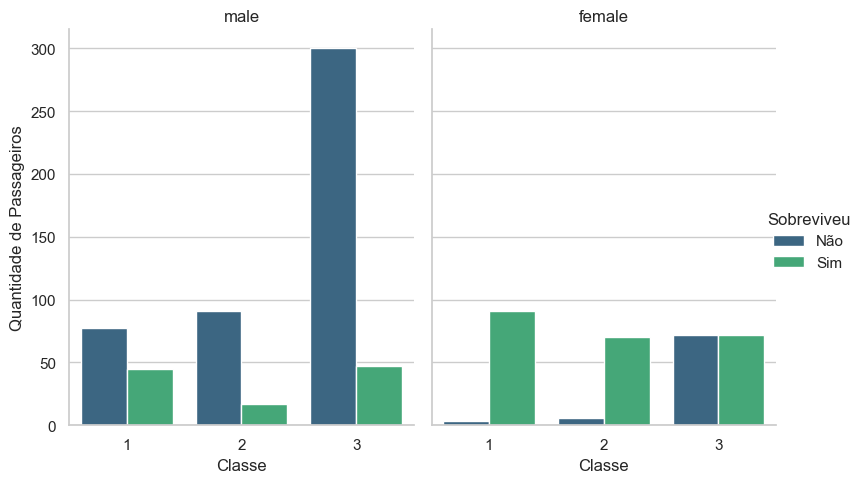

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o gráfico cruzando Sobrevivência, Classe e Sexo
g = sns.catplot(
    data=df, 
    x="Pclass", 
    hue="Survived", 
    col="Sex", 
    kind="count", 
    palette="viridis",
    height=5, 
    aspect=0.8
)

# Ajustando títulos e legendas
g.set_axis_labels("Classe", "Quantidade de Passageiros")
g.set_titles("{col_name}")
g._legend.set_title("Sobreviveu")
new_labels = ['Não', 'Sim']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()